Линейная регрессия


Поиск линейной зависимости целевого признака от признаков, описывающих данные, путём минимизации ошибки (выбранной нами) между истинными и предсказанными значениями целевого признака.

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns

Описание и демонстрация используемого датасета

Data Set Characteristics:

Number of Instances: 20640

Number of Attributes: 8 numeric, predictive attributes and the target

Attribute Information: 
MedInc median income in block group

HouseAge median house age in block group

AveRooms average number of rooms per household

AveBedrms average number of bedrooms per household

Population block group population

AveOccup average number of household members

Latitude block group latitude

Longitude block group longitude

Missing Attribute Values: None

This dataset was obtained from the StatLib repository. https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

A household is a group of people residing within a home. Since the average number of rooms and bedrooms in this dataset are provided per household, these columns may take surprisingly large values for block groups with few households and many empty houses, such as vacation resorts.

It can be downloaded/loaded using the sklearn.datasets.fetch_california_housing function.

References: Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions, Statistics and Probability Letters, 33 (1997) 291-297

In [3]:
housing = fetch_california_housing(as_frame=True)
print(housing.data.shape, housing.target.shape)
print(housing.feature_names)

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [9]:
housing.frame.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'MedHouseVal'}>]], dtype=object)

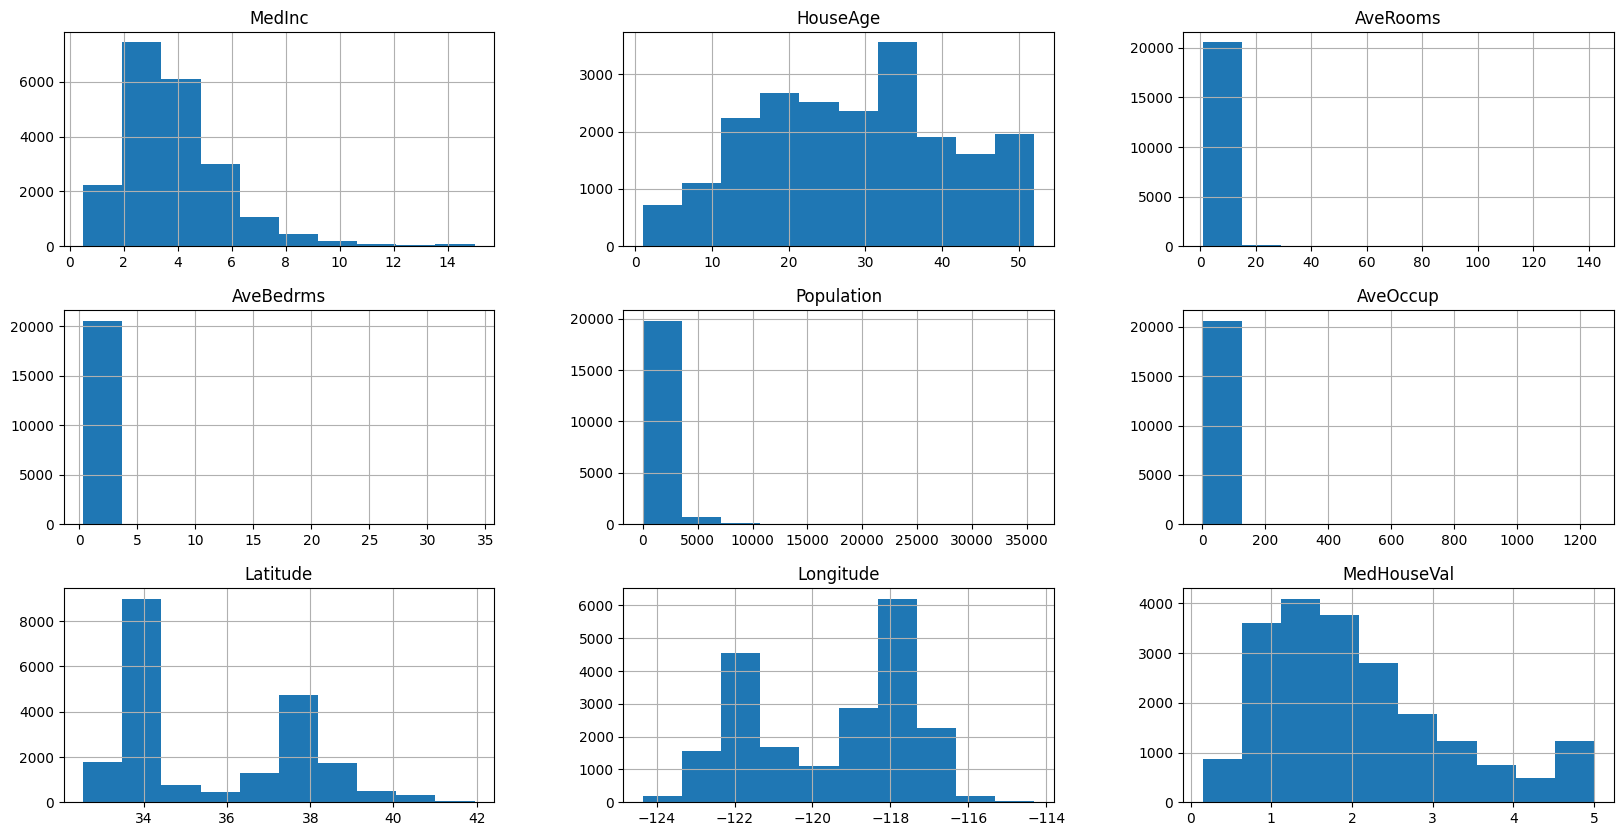

In [5]:
df = housing.frame
df.hist(figsize=(20, 10), bins=10)

<Axes: >

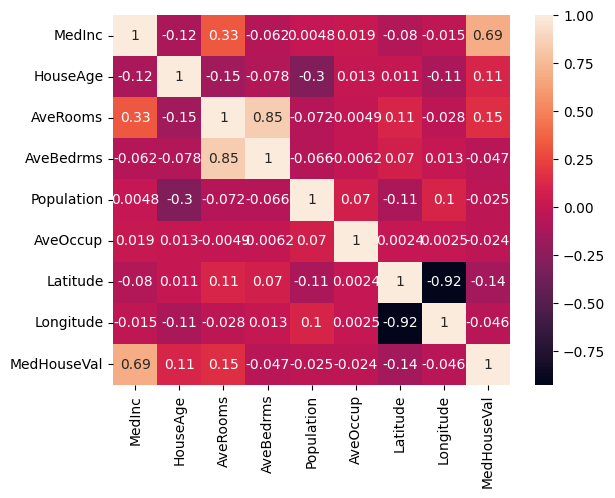

In [13]:
sns.heatmap(df.corr(), annot=True)

In [14]:
df[df['AveRooms'] > 50]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
1912,4.9750,16.0,56.269231,10.153846,54.0,2.076923,39.01,-120.16,2.06300
1913,4.0714,19.0,61.812500,11.000000,112.0,2.333333,39.01,-120.06,4.37500
1914,1.8750,33.0,141.909091,25.636364,30.0,2.727273,38.91,-120.10,5.00001
1979,4.6250,34.0,132.533333,34.066667,36.0,2.400000,38.80,-120.08,1.62500
2395,3.8750,23.0,50.837838,10.270270,64.0,1.729730,37.12,-119.34,1.25000
9676,3.2431,14.0,52.848214,11.410714,265.0,2.366071,37.64,-119.02,2.21400
11707,1.1912,22.0,52.690476,8.857143,98.0,2.333333,39.15,-120.06,1.70000
11862,2.6250,25.0,59.875000,15.312500,28.0,1.750000,40.27,-121.25,0.67500
12447,1.6154,17.0,62.422222,14.111111,83.0,1.844444,33.97,-114.49,0.87500


In [151]:
df = df.drop(df[df['AveRooms'] > 50].index)
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000
mean,3.870998,28.642140,5.398835,1.090328,0.250206,3.071047,35.630737,-119.569780,2.068502
std,1.899981,12.586879,1.881365,0.322298,0.433142,10.388296,2.135436,2.003602,1.153823
min,0.499900,1.000000,0.846154,0.333333,0.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563800,18.000000,4.440403,1.006039,0.000000,2.430370,33.930000,-121.800000,1.196000
50%,3.534900,29.000000,5.227941,1.048749,0.000000,2.818493,34.260000,-118.490000,1.797000
75%,4.743700,37.000000,6.051627,1.099440,1.000000,3.282302,37.710000,-118.010000,2.647500
max,15.000100,52.000000,47.515152,11.181818,1.000000,1243.333333,41.950000,-114.310000,5.000010


In [139]:
df[df['AveBedrms'] > 10].index

Index([1240], dtype='int64')

<Axes: >

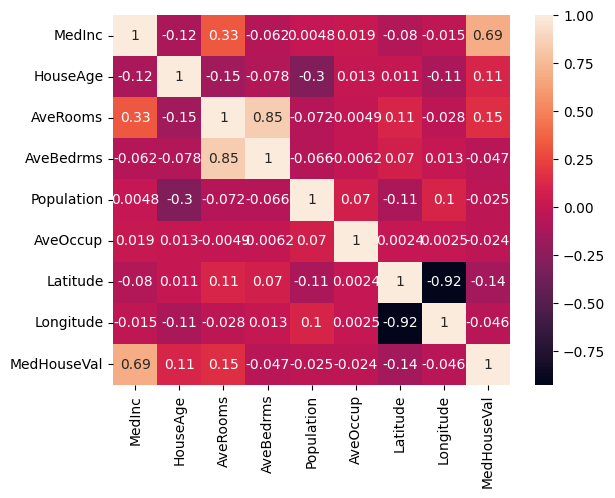

In [8]:
sns.heatmap(df.corr(), annot=True)

In [141]:
df[['AveRooms', 'AveBedrms']].corr()

,AveRooms,AveBedrms
AveRooms,1.000000,0.732394
AveBedrms,0.732394,1.000000


In [142]:
df[['Latitude', 'Longitude']].corr()

,Latitude,Longitude
Latitude,1.000000,-0.924993
Longitude,-0.924993,1.000000


In [15]:
df = housing.frame.drop(columns=['Longitude'])

In [16]:
df.shape

(20640, 8)

In [17]:
df = (df - df.mean()) / df.std()

In [34]:
df['Population'] = df['Population'].map(lambda x: 0 if x < df['Population'].quantile(q=0.75) else 1)

In [35]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,MedHouseVal
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,20640.000000,2.064000e+04,2.064000e+04,2.064000e+04
mean,7.711317e-17,3.855658e-17,7.711317e-17,-1.046536e-16,0.250097,6.885104e-19,-9.914550e-16,2.203233e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.433079,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.774256e+00,-2.196127e+00,-1.852274e+00,-1.610729e+00,0.000000,-2.289944e-01,-1.447533e+00,-1.662601e+00
25%,-6.881019e-01,-8.453727e-01,-3.994399e-01,-1.911670e-01,0.000000,-6.170912e-02,-7.967694e-01,-7.561450e-01
50%,-1.767908e-01,2.864502e-02,-8.078293e-02,-1.010626e-01,0.000000,-2.431526e-02,-6.422715e-01,-2.353280e-01
75%,4.592952e-01,6.642943e-01,2.519554e-01,6.015724e-03,1.000000,2.037404e-02,9.729330e-01,5.014851e-01
max,5.858144e+00,1.856137e+00,5.516190e+01,6.957003e+01,1.000000,1.194162e+02,2.957996e+00,2.540349e+00


In [36]:
target = 'MedHouseVal'

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=target), df[target], test_size=0.2, random_state=12345)

In [38]:
model = SGDRegressor(tol=.0001, eta0=.01) # epsilon_insensitive, huber, squared_loss
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print(f'MAE train: {mean_absolute_error(y_train, y_pred_train)}, MAE test: {mean_absolute_error(y_test, y_pred_test)}')
print(f'MSE train: {mean_squared_error(y_train, y_pred_train)**0.5}, MSE test: {mean_squared_error(y_test, y_pred_test)**0.5}')
print(f'R2_score train: {r2_score(y_train, y_pred_train)}, R2_score test: {r2_score(y_test, y_pred_test)}')

MAE train: 0.4944900558524419, MAE test: 0.5014505329125976
MSE train: 0.6751759728405317, MSE test: 0.7036844629644652
R2_score train: 0.5441803713401168, R2_score test: 0.5044262076062854


In [39]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print(f'MAE train: {mean_absolute_error(y_train, y_pred_train)}, MAE test: {mean_absolute_error(y_test, y_pred_test)}')
print(f'MSE train: {mean_squared_error(y_train, y_pred_train)**0.5}, MSE test: {mean_squared_error(y_test, y_pred_test)**0.5}')
print(f'R2_score train: {r2_score(y_train, y_pred_train)}, R2_score test: {r2_score(y_test, y_pred_test)}')

MAE train: 0.4939497303323233, MAE test: 0.5015975816809083
MSE train: 0.6729138034907374, MSE test: 0.6918222480090532
R2_score train: 0.5472296912834507, R2_score test: 0.5209934461740936


In [40]:
pd.DataFrame(model.coef_, index=X_test.columns)

,0
MedInc,0.888502
HouseAge,0.178194
AveRooms,-0.483448
AveBedrms,0.440218
Population,0.037066
AveOccup,-0.056124
Latitude,-0.055135


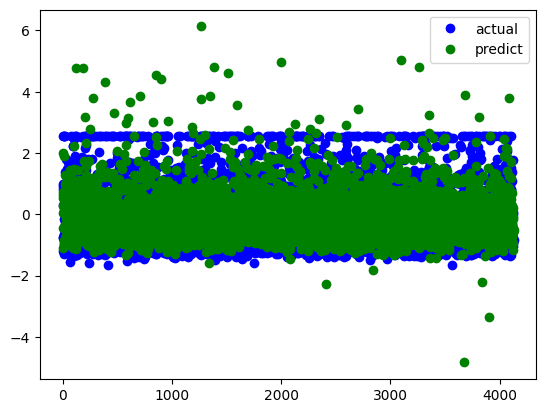

In [44]:
xs = range(len(y_test))
plt.plot(xs, y_test, 'bo', label='actual')
plt.plot(xs, y_pred_test, 'go', label='predict')
plt.legend()
plt.show()

In [65]:
feature = 'MedInc'
X_train, X_test, y_train, y_test = train_test_split(df[[feature]], df[target], test_size=0.2, random_state=12345)

In [66]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print(f'MAE train: {mean_absolute_error(y_train, y_pred_train)}, MAE test: {mean_absolute_error(y_test, y_pred_test)}')
print(f'MSE train: {mean_squared_error(y_train, y_pred_train)**0.5}, MSE test: {mean_squared_error(y_test, y_pred_test)**0.5}')
print(f'R2_score train: {r2_score(y_train, y_pred_train)}, R2_score test: {r2_score(y_test, y_pred_test)}')

MAE train: 0.5428589620009744, MAE test: 0.5412761902224237
MSE train: 0.7261987313018794, MSE test: 0.7233153347003328
R2_score train: 0.4726851074534206, R2_score test: 0.4763902171060326


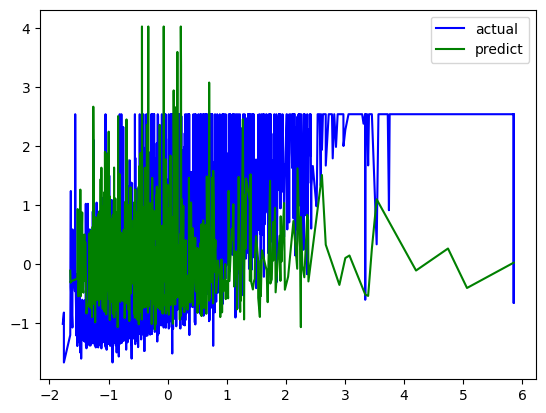

In [78]:
actual = y_test.to_frame().merge(X_test, left_index=True, right_index=True).sort_values(feature)
predict = pd.DataFrame(y_pred_test, columns=[target]).merge(X_test, left_index=True, right_index=True).sort_values(feature)

plt.plot(actual[feature], actual[target], 'b', label='actual')
plt.plot(predict[feature], predict[target], 'g', label='predict')
plt.legend()
plt.show()